# 2.1.1 AR 過程　～ AutoRegressive Process～

過程が自身の過去に回帰された形で表現される。

【定義】１次AR過程とは、

$$ y_{t} = c + \phi_{1} y_{t-1} + \epsilon_{t} , \hspace{15pt} \epsilon_{t} \sim W.N.(\sigma^{2}) $$

で定義され、$y_{t}$がAR(1)に従うことは、$y_{t} \sim AR(1)$ と表現する。

$c$ および $\phi_{1}$は定数（パラメータ）である。


### AR(1)過程の性質

* MA過程と同様に、AR過程の確率的変動はかく乱項であるホワイトノイズ$\epsilon_{t}$によって決まる
* 初期値問題 $y_{0}$ をどのように決めるのか？（ $y_{-1}$ は存在しない）
  * yの条件なし分布が定まっている場合は、その分布に従う確率変数とするのが一般的
  * 分布が定まっていない場合は、何らかの定数とすることが多い
  * 分布が定常であれば、初期値の影響は減衰していくので大きな問題にはならない

  

## 例2.2 AR(1)の具体例の計算

python で計算してみました。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

c = 1
phi = 0.5
epsilon = np.array([0,-2.1,0.9,-0.2,-0.5,0.3,-0.4,0.8,2.2,-0.6,0.8]) # 先頭の0に注意,,,
y = np.zeros(len(epsilon)) # 初期値ゼロ

for t in range(1, len(epsilon)):
    y[t] = c + phi * y[t-1] + epsilon[t] # epsilonによってyが決定する

y[1:]

array([-1.1       ,  1.35      ,  1.475     ,  1.2375    ,  1.91875   ,
        1.559375  ,  2.5796875 ,  4.48984375,  2.64492188,  3.12246094])

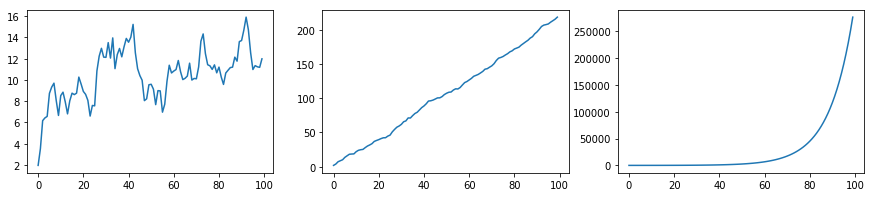

In [2]:
const = 2 # parameter
phi = 0.8, 1, 1.1 # parameter
sample = 101 # sample
np.random.seed(seed=20180609) #seed
mean , variance = 0, 1 # normdist params
plt.figure(figsize=(15,3)) # graph size

epsilon = np.array(np.random.normal(mean, variance, sample)) # 正規ホワイトノイズ

def create_ar(c, p, e):
    y = np.zeros(len(e))    
    for t in range(1, len(e)):
        y[t] = c + p * y[t-1] + e[t] # epsilonによってyが決定する
    return y

for i in range(0,len(phi)):
    plt.subplot(1,3,i+1)
    y = create_ar(const,phi[i],epsilon)
    plt.plot(y[1:])


### AR過程の定常性

* AR過程はMA過程と異なり、モデルの定常性はパラメータに依存する(MAはパラメータに関係なく定常)
* AR(1) の場合、$|\phi| < 1$のとき過程は定常となる。先ほどの図の一番左（$\phi = 0.8$）。
* $\phi = 1$ を「単位根」過程と呼ぶ。⇒５章で取り扱う
* $\phi > 1$ 過程が指数的に上昇。「爆発的(explosive)」と呼ぶ。

本書では定常過程を取り扱うので、$|\phi| < 1$を仮定して、AR(1)の特徴を見ていく。

### AR(1)の期待値

【メモ】この期待値の算出方法は教科書の方法と異なるが、p.36-37の証明になる。

AR(1)の期待値 $E[y_{t}]$を計算する。まず、$y{t}$および、その１期前の$y_{t-1}$をAR過程の定義に従って書き出すと、

$$
y_{t}   = c + \phi_{1} y_{t-1} + \epsilon_{t} \\
y_{t-1} = c + \phi_{1} y_{t-2} + \epsilon_{t-1} \\
$$

となる。上の式の$y_{t-1}$に対して、下の式を代入すると、

$$
y_{t} = c + \phi_{1} (c + \phi_{1} y_{t-2} + \epsilon_{t-1}) + \epsilon_{t} \\
y_{t} = (1 + \phi_{1})c + \phi^2_{1}y_{t-2} + (\epsilon_{t} + \phi_{1}\epsilon_{t-1})
$$

### AR(1)の期待値（つづき）

$$
y_{t} = (1 + \phi_{1})c + \phi^2_{1}y_{t-2} + (\epsilon_{t} + \phi_{1}\epsilon_{t-1})
$$

ここで、先ほどと同様に$y_{t-2}, y_{t-3}, \dots$を逐次代入していくと、

* $y_{t-2} = c + \phi_{1} y_{t-3} + \epsilon_{t-2}$を代入
  * $ y_{t} = (1 + \phi_{1})c + \phi_{1}^2(c + \phi_{1} y_{t-3} + \epsilon_{t-2}) + (\epsilon_{t} + \phi_{1}\epsilon_{t-1})$
  * $ y_{t} = (1 + \phi_{1} + \phi_{1}^2)c + \phi^3_{1}y_{t-3} + (\epsilon_{t} + \phi_{1}\epsilon_{t-1}+ \phi_{1}^2\epsilon_{t-2})$


* $y_{t-3} = c + \phi_{1} y_{t-4} + \epsilon_{t-3}$を代入
  * $ y_{t} = (1 + \phi_{1} + \phi_{1}^2)c + \phi^3_{1}(c + \phi_{1} y_{t-4} + \epsilon_{t-3}) + (\epsilon_{t} + \phi_{1}\epsilon_{t-1}+ \phi_{1}^2\epsilon_{t-2}) $
  * $ y_{t} =  (1 + \phi_{1} + \phi_{1}^2 +\phi_{1}^3)c 
  + \phi^4_{1}y_{t-4} + (\epsilon_{t} + \phi_{1}\epsilon_{t-1}+ \phi_{1}^2\epsilon_{t-2}+ \phi_{1}^3\epsilon_{t-3}) $



### AR(1)の期待値（つづき）

先ほどの処理をN回繰り返すと、

$$
y_{t} =  (1 + \phi_{1} + \phi_{1}^2 + \phi_{1}^3 + \dots + \phi_{1}^N)c
  + \phi^{N+1}_{1}y_{t-N+1} 
  + (\epsilon_{t} + \phi_{1}\epsilon_{t-1}+ \phi_{1}^2\epsilon_{t-2}+ \phi_{1}^3\epsilon_{t-3} + \dots + \phi_{1}^N\epsilon_{t-N})
$$

まとめると、

$$
y_{t} = (\sum_{i=0}^{N}\phi_{1}^{i})c + \phi^{N+1}_{1}y_{t-N+1} + (\sum_{i=0}^{N}\phi_{1}^{i}\epsilon_{t-i})
$$

$N \to \infty$とすると、$|\phi| < 1$の仮定より、第１項は無限等比級数の和 $\frac{1}{1-\phi}c$、第２項は0に収束するので、

$$
y_{t} = \frac{1}{1-\phi}c + (\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-i}) \\
E[y_{t}] = E[\frac{1}{1-\phi}c] + \sum_{i=0}^{\infty}\phi_{1}^{i}E[\epsilon_{t-i}] \\
E[y_{t}] = \frac{c}{1-\phi}
$$



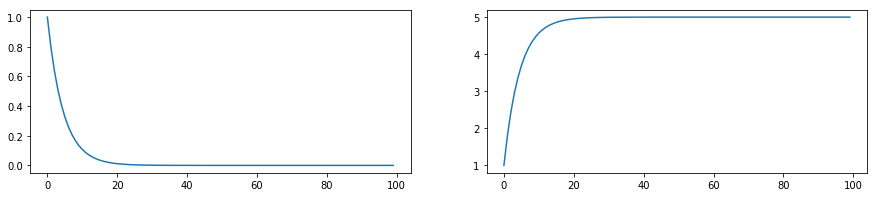

In [3]:
# おまけ
phi = 0.8
iteration = 100
y = np.zeros(iteration)
z = np.zeros(iteration)

plt.figure(figsize=(15,3)) # graph size
plt.subplot(1,2,1)
# 第２項がゼロに収束していく様
for i in range(0,iteration):
    y[i] = phi ** i
plt.plot(y)
# 無限等比級数の和の可視化
plt.subplot(1,2,2)
z = np.cumsum(y)
plt.plot(z)

### AR(1) と MA( $\infty$ ) 教科書p.36 - 37 定数項あり
$|\phi| < 1$ であれば、

$$
y_{t} = \frac{1}{1-\phi}c + (\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-i}) \\
$$

は、

$$
y_{t} = \mu + \epsilon_{t}  + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \dots 
$$

書き直すことができる。これは$MA(\infty)$の定義と等しい。

逆に言えば、$|\phi| < 1$ でなければ、AR過程をMA過程で表現することはできない。


### AR(1)の分散

AR(1)の分散を計算する。期待値の計算で得た結果を用いると、

$$
V[y_{t}] = E[(y_{t} - E(y_{t})^2] = E[(\frac{1}{1-\phi}c + (\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-i}) - \frac{1}{1-\phi}c)^2] \\
=  E[(\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-i})^2]
$$

とかける。シグマを展開すると、

$$
V[y_{t}] = E[(\epsilon_{t} + \phi_{1}\epsilon_{t-1} + \phi_{1}^2\epsilon_{t-2} + \dots)(\epsilon_{t} + \phi_{1}\epsilon_{t-1} + \phi_{1}^2\epsilon_{t-2} + \dots) ]
$$

W.N.の定義より、$E[\epsilon_{i}\epsilon_{j}(i \ne j)] = 0$ になるので、$\epsilon_{i}^2$となるような項だけ抜き出すと、

$$
= E[ \epsilon_{t}^2 + \phi_{1}^2\epsilon_{t-1}^2 + \phi_{1}^4\epsilon_{t-1}^2 + \phi_{1}^6\epsilon_{t-1}^2 + \dots]
$$


### AR(1)の分散(つづき)

項ごとに期待値計算をすると、

$$
V[y_{t}] = E[ \epsilon_{t}^2] + E[\phi_{1}^2\epsilon_{t-1}^2] + E[\phi_{1}^4\epsilon_{t-1}^2] + E[\phi_{1}^6\epsilon_{t-1}^2] + \dots \\
= \sigma^2  + \phi_{1}^{2}\sigma^{2} + \phi_{1}^{4}\sigma^{2} + \phi_{1}^{6}\sigma^{2} + \dots \\
= (1  + \phi_{1}^{2} + \phi_{1}^{4} + \phi_{1}^{6} + \dots)\sigma^{2}
$$

$|\phi_1| < 1$より無限等比級数の和の公式が使えるので、

$$
V[y_{t}] = (\frac{1}{1-\phi_{1}^2})\sigma^2 =  (\frac{\sigma^2}{1-\phi_{1}^2}) 
$$

### AR(1) (k=1)の自己共分散

k=1(1期前との場合)の場合をまず計算する。期待値の計算で得た結果を用いると、

$$
\gamma_{1} = Cov(y_{t},y_{t-1}) = E[(y_{t}-E[y_{t}])((y_{t-1}-E[y_{t-1}])] \\
= E[(\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-i})(\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-1-i})]
$$

$$
\gamma_{1} = E[(\epsilon_{t} + \phi_{1}\epsilon_{t-1} + \phi_{1}^2\epsilon_{t-2} + \dots)(\epsilon_{t-1} + \phi_{1}\epsilon_{t-2} + \phi_{1}^2\epsilon_{t-3} + \dots) ]
$$

分散の計算のときと同様に、$\epsilon_{i}^2$ となるような項だけを抜き出す（＝その他の項は全てゼロになってしまうので不要）と、

$$
= E[ \phi_{1}\epsilon_{t}^2 + \phi_{1}^3\epsilon_{t-1}^2 + \phi_{1}^5\epsilon_{t-1}^2 + \phi_{1}^7\epsilon_{t-1}^2 + \dots]
$$

### AR(1) (k=1)の自己共分散（つづき）
項ごとに期待値計算をすると、

$$
\gamma_{1} = E[\phi_{1}\epsilon_{t}^2] + E[\phi_{1}^3\epsilon_{t-1}^2] + E[\phi_{1}^5\epsilon_{t-1}^2] + E[\phi_{1}^7 \epsilon_{t-1}^2] + \dots \\
= \phi_{1}\sigma^2  + \phi_{1}^{3}\sigma^{2} + \phi_{1}^{5}\sigma^{2} + \phi_{1}^{7}\sigma^{2} + \dots \\
= \phi_{1}(1  + \phi_{1}^{2} + \phi_{1}^{4} + \phi_{1}^{6} + \dots)\sigma^{2}
$$

先ほどの分散の計算結果を用いて、

$$
\gamma_{1} = \phi_1 \gamma_0
$$


### AR(1) (k=2)の自己共分散

次に、k=2の場合を計算する。k=1の時と同様に、

$$
\gamma_{2} = Cov(y_{t},y_{t-2}) = E[(y_{t}-E[y_{t}])((y_{t-1}-E[y_{t-2}])] \\
= E[(\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-i})(\sum_{i=0}^{\infty}\phi_{1}^{i}\epsilon_{t-2-i})]
$$

$$
\gamma_{2} = E[(\epsilon_{t} + \phi_{1}\epsilon_{t-1} + \phi_{1}^2\epsilon_{t-2} + \dots)(\epsilon_{t-2} + \phi_{1}\epsilon_{t-3} + \phi_{1}^2\epsilon_{t-4} + \dots) ]\\
= \phi_{1}^{2}(1  + \phi_{1}^{2} + \phi_{1}^{4} + \phi_{1}^{6} + \dots)\sigma^{2}
$$

先ほどの分散の計算結果$\gamma_{1} = \phi_1 \gamma_0$を用いて、

$$
\gamma_{2} = \phi_1^2 \gamma_0 =  \phi_1 \gamma_1
$$



### AR(1) 自己共分散(一般形)

k=1,2とおいて導いた結果からも想像がつくが、期待値計算内のひとつめのカッコ内の多項式においてk-1次までの項はふたつめのカッコ内に存在しない項であるため、期待値計算上無視できて、

$$
\gamma_{k} = E[(\epsilon_{t} + \dots + \phi_{1}^{k}\epsilon_{t-k} + \phi_{1}^{k+1}\epsilon_{t-k}\dots)
(\epsilon_{t-k} + \phi_{1}\epsilon_{t-k-1} + \phi_{1}^2\epsilon_{t-k-2} + \dots) ]\\
= \phi_{1}^{k}(1  + \phi_{1}^{2} + \phi_{1}^{4} + \phi_{1}^{6} + \dots)\sigma^{2}
$$
よって

$$
\gamma_{k} = \phi_1^k \gamma_0 = \phi_1^{k-1}\phi_1 \gamma_0 = \phi_1^{k-1}\gamma_1 =  \phi_1^{k-2}\phi_1 \gamma_1 = \phi_1^{k-2}\gamma_2 = \dots \\
\gamma_{k} = \phi_{1}\gamma_{k-1}
$$

### AR(1) 自己共分散(一般形) からのユール・ウォーカー方程式

$\gamma_{k} = \phi_{1}\gamma_{k-1}$という先ほどの結果の両辺を$\gamma_{0}$ で割ると、$\rho$の定義より、

$$ 
\rho_{k} = \phi_{1}\rho_{k-1} 
$$

が導かれる。これを、「ユール・ウォーカー方程式」と呼ぶ。$ \rho_{0}:= \frac{\gamma_{0}}{\gamma_{0}} = 1 $ を用いて、$\rho_{k}$を逐次的に求めることができる。

$$
\rho_{k} =  \phi_{1}\rho_{k-1} = \phi_{1}^{2}\rho_{k-2} = \phi_{1}^{3}\rho_{k-3}  = \dots = \phi_{1}^{k}\rho_{0} = \phi_{1}^{k}
$$

$|\phi_{1}| < 0$ より、AR(1)過程の自己相関の絶対値は指数的に減衰することがわかる。